In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [65]:

#file = "C:/Users/phbcat/OneDrive - Loughborough University/Group Project/Data/1331_1453_fx_tenor_curves_lboro_data_20231011.txt"
file = "C:/Users/phbcat/OneDrive - Loughborough University/Group Project/Data/1128_1419_fx_tenor_curves_lboro_data_20231011.txt"
df = pd.read_csv(file)

currencyOfInterest = 'GBP'
Rate = "Spot Rate"
dataOI = df[df['Currency']==currencyOfInterest]

In [66]:
dates = pd.to_datetime(dataOI['Date'])
spotRates = dataOI[Rate]

In [67]:
log_gap = 1
log_returns = np.log(spotRates.shift(log_gap)/spotRates)
dates = dates.shift(log_gap)
#print(len(log_returns))

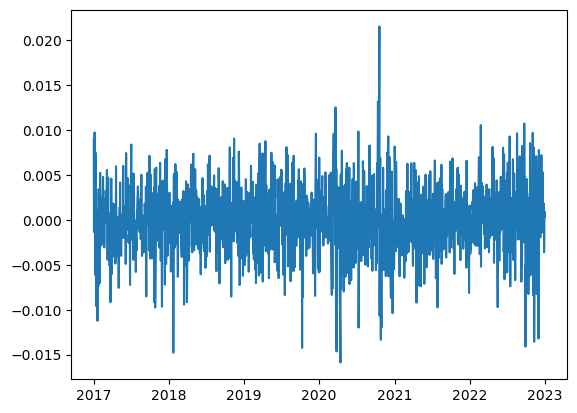

In [68]:
plt.plot(dates,log_returns)

<function matplotlib.pyplot.show(close=None, block=None)>

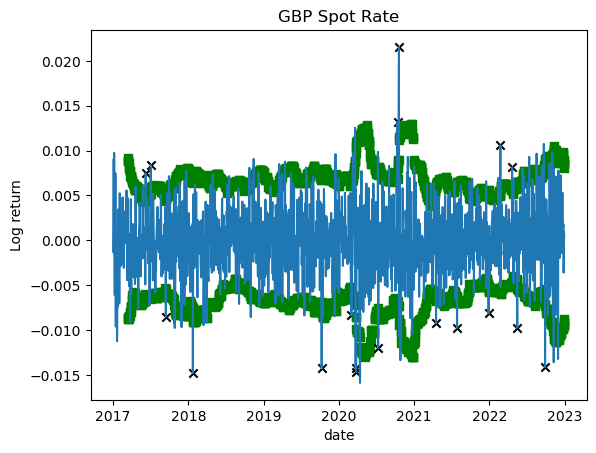

In [71]:
sliding_size = 50
Anom = []
for i in range(len(log_returns)-sliding_size):
    window = []
    for j in range(sliding_size):
        window.append(log_returns.iloc[i+j])
    MEAN = np.mean(window)
    STANDARD = np.std(window)
    
    if log_returns.iloc[i+sliding_size] > MEAN+(3*STANDARD):
        Anom.append(dates.iloc[i+sliding_size])
        plt.scatter(dates.iloc[i+sliding_size],log_returns.iloc[i+sliding_size],marker = 'x',color='black')
    if log_returns.iloc[i+sliding_size] < MEAN-(3*STANDARD):
        Anom.append(dates.iloc[i+sliding_size])
        plt.scatter(dates.iloc[i+sliding_size],log_returns.iloc[i+sliding_size],marker = 'x',color='black')
    if log_returns.iloc[i+sliding_size] == 0:
        Anom.append(dates.iloc[i+sliding_size])
        plt.scatter(dates.iloc[i+sliding_size],log_returns.iloc[i+sliding_size],marker = 'x',color='black')
    #plt.axhline(y = MEAN+(2*STANDARD), color = 'b', linestyle = '-', xmin = i, xmax = i+Sliding_window)
    #plt.axhline(y = MEAN-(2*STANDARD), color = 'b', linestyle = '-', xmin = i, xmax = i+Sliding_window)
    plt.scatter(dates.iloc[i+sliding_size],MEAN+(2*STANDARD),marker = 's',color='green')
    plt.scatter(dates.iloc[i+sliding_size],MEAN-(2*STANDARD),marker = 's',color='green')
#print(Anom)
plt.ylabel("Log return")
plt.xlabel("date")
plt.title(str(currency) +" "+ str(Rate))
plt.plot(dates,log_returns)
plt.show

In [72]:
print(Anom)

[Timestamp('2017-04-28 00:00:00'), Timestamp('2017-06-08 00:00:00'), Timestamp('2017-07-03 00:00:00'), Timestamp('2017-09-14 00:00:00'), Timestamp('2018-01-23 00:00:00'), Timestamp('2018-11-01 00:00:00'), Timestamp('2019-10-10 00:00:00'), Timestamp('2020-02-14 00:00:00'), Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-23 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-07-10 00:00:00'), Timestamp('2020-10-12 00:00:00'), Timestamp('2020-10-19 00:00:00'), Timestamp('2021-04-17 00:00:00'), Timestamp('2021-07-28 00:00:00'), Timestamp('2021-12-28 00:00:00'), Timestamp('2022-02-23 00:00:00'), Timestamp('2022-04-21 00:00:00'), Timestamp('2022-05-16 00:00:00'), Timestamp('2022-09-28 00:00:00')]


In [81]:
print(str((100*len(Anom)/len(log_returns)))+" %")

1.259748050389922 %
